In [1]:
import numpy as np
#import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%run 3d_to_nc.py -d .

Processing        u, time=   1000Processing        b, time=   1000

Processing        w, time=   1000Processing        v, time=   1000

Processing        u, time=   1100Processing        b, time=   1100

Processing        w, time=   1100Processing        v, time=   1100

Processing        u, time=   1200Processing        b, time=   1200

Processing        w, time=   1200Processing        v, time=   1200

Processing        u, time=   1300Processing        b, time=   1300

Processing        w, time=   1300Processing        v, time=   1300

Processing        u, time=   1400Processing        b, time=   1400

Processing        w, time=   1400Processing        v, time=   1400

Processing        u, time=   1500Processing        b, time=   1500

Processing        w, time=   1500Processing        v, time=   1500

Processing        u, time=   1600Processing        b, time=   1600

Processing        w, time=   1600Processing        v, time=   1600



In [3]:
ds = xr.open_mfdataset(['u.nc','v.nc','w.nc','b.nc'])

In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 7, z: 64, y: 32, x: 32, xh: 32, yh: 32, zh: 64)
Coordinates:
  * time     (time) float64 100.0 110.0 120.0 130.0 140.0 150.0 160.0
  * z        (z) float64 0.1412 0.4236 0.706 0.9885 ... 17.09 17.37 17.65 17.93
  * y        (y) float64 0.4279 1.284 2.14 2.995 ... 24.39 25.25 26.1 26.96
  * x        (x) float64 0.4279 1.284 2.14 2.995 ... 24.39 25.25 26.1 26.96
  * xh       (xh) float64 0.0 0.8558 1.712 2.567 ... 23.96 24.82 25.67 26.53
  * yh       (yh) float64 0.0 0.8558 1.712 2.567 ... 23.96 24.82 25.67 26.53
  * zh       (zh) float64 0.0 0.2824 0.5648 0.8473 ... 16.95 17.23 17.51 17.79
Data variables:
    b        (time, z, y, x) float64 dask.array<chunksize=(7, 64, 32, 32), meta=np.ndarray>
    u        (time, z, y, xh) float64 dask.array<chunksize=(7, 64, 32, 32), meta=np.ndarray>
    v        (time, z, yh, x) float64 dask.array<chunksize=(7, 64, 32, 32), meta=np.ndarray>
    w        (time, zh, y, x) float64 dask.array<chunksize=(7, 64, 32, 32), meta=np.ndarray>

In [5]:
# ds['time']

In [15]:
vars = ['u','v','w','b']
x = ds['x'].values
xh = ds['xh'].values
y = ds['y'].values
yh = ds['yh'].values
z = ds['z'].values
zh = ds['zh'].values
time = ds['time'].values

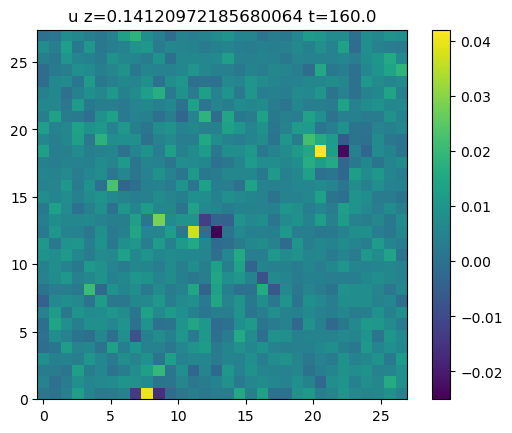

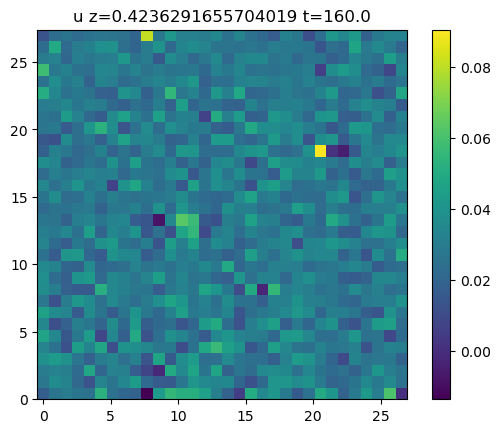

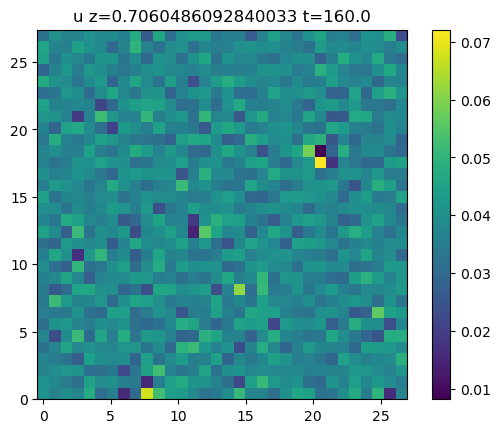

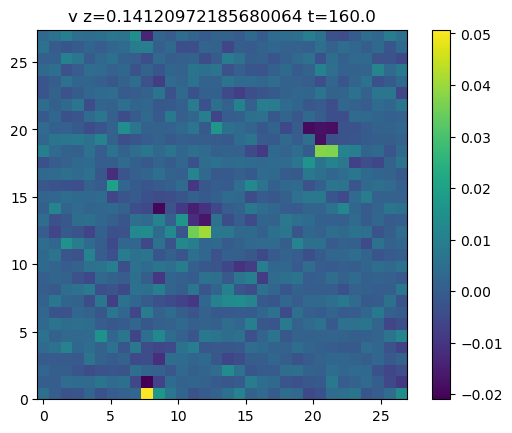

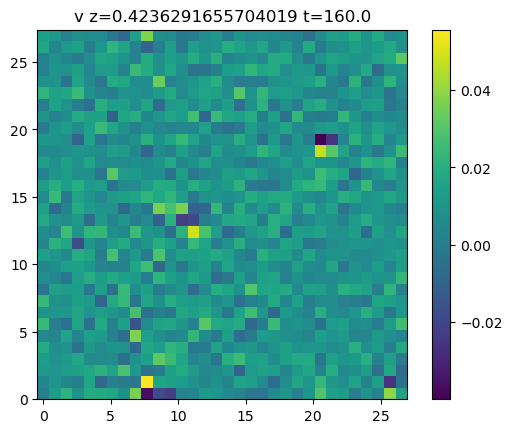

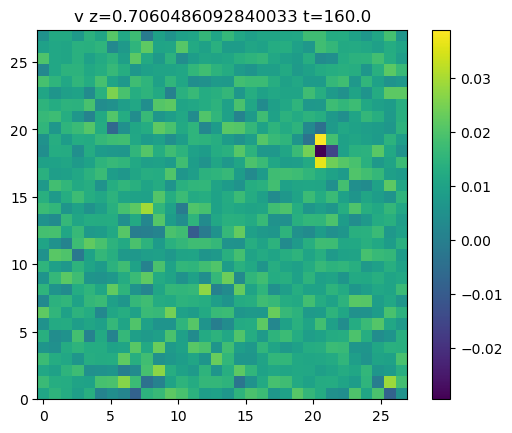

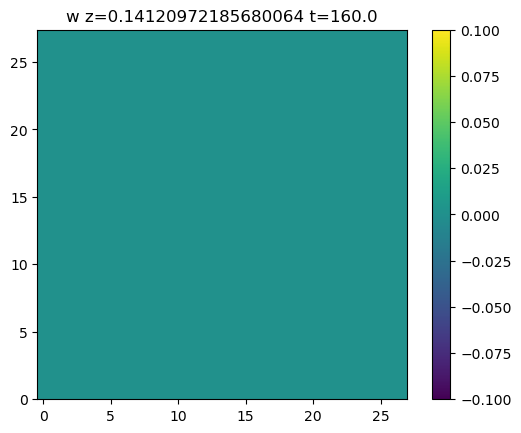

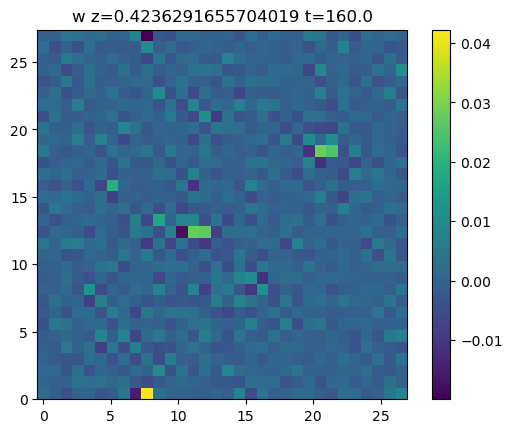

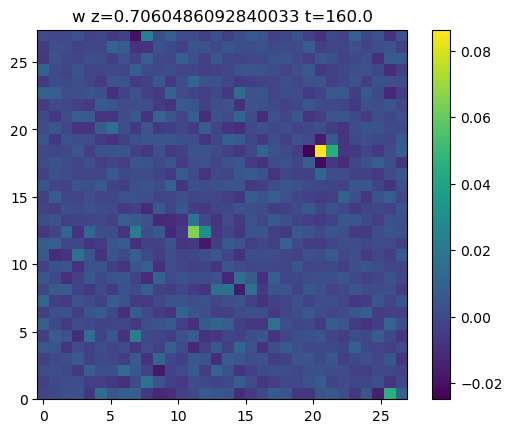

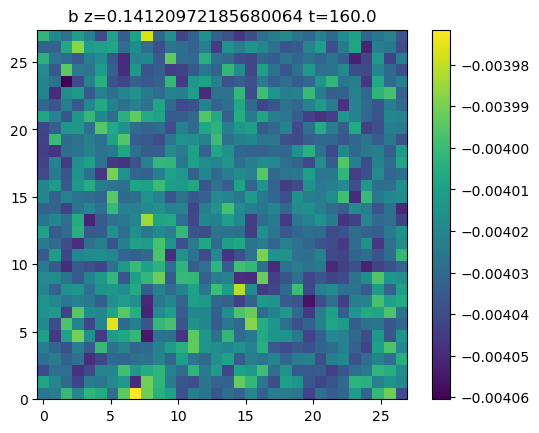

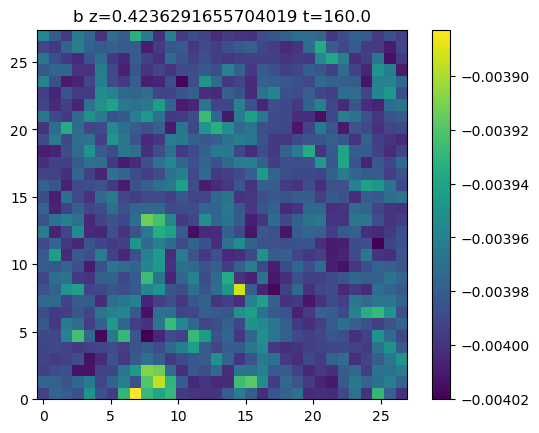

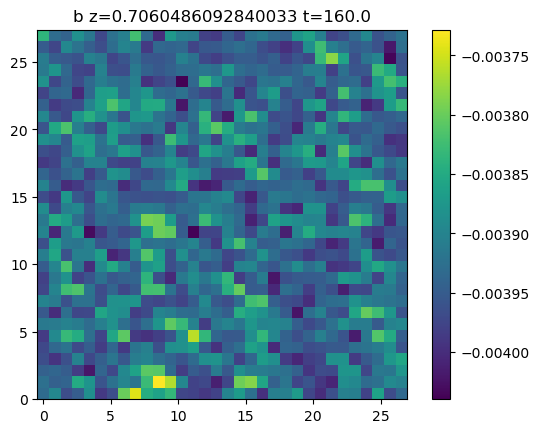

In [16]:
for var in vars:
    for kplot in [0,1,2]:#range(0,64,15):
        for tplot in [-1]:#range(time.shape[0]):
            # vmax=0.02
            # vmin=0.0
            fig,axs=plt.subplots(1,1)#,figsize=(20,10))
            try:
                cf=axs.pcolormesh(xh,y,ds[var][tplot,kplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            except:
                cf=axs.pcolormesh(x,yh,ds[var][tplot,kplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
                        
            axs.set_aspect('equal')
            axs.set_title(var+' z='+str(z[kplot])+' t='+str(time[tplot]))

            #cf.set_clim(vmin,vmax)
            #fig.subplots_adjust(right=0.9)
            #cbar_ax = fig.add_axes([0.95, 0.1, 0.01, 0.7])
            #cbar=fig.colorbar(cf,cax=cbar_ax)#,boundaries=np.linspace(vmin,vmax,num=9))
            fig.colorbar(cf)
            
            plt.show()
            del(fig,axs)

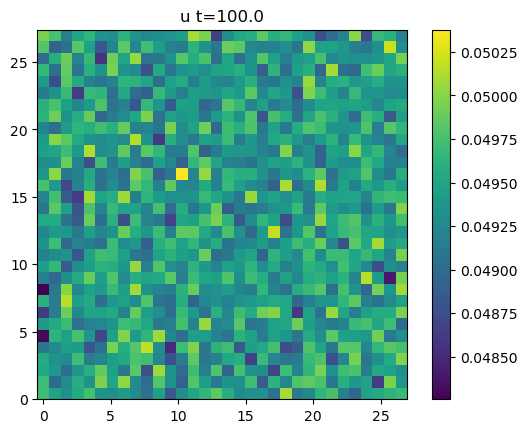

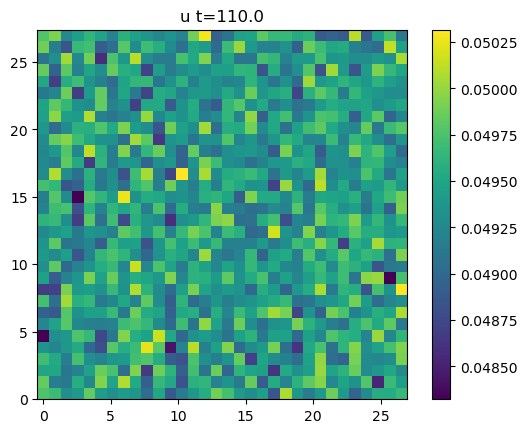

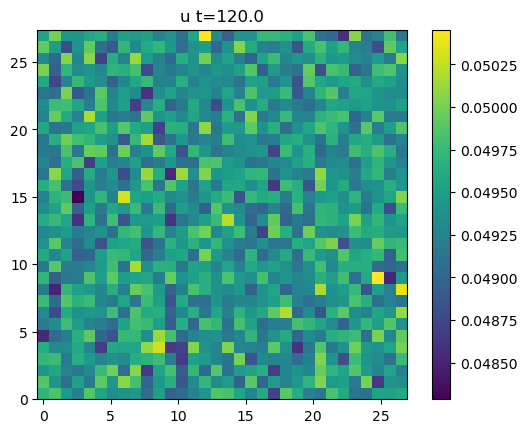

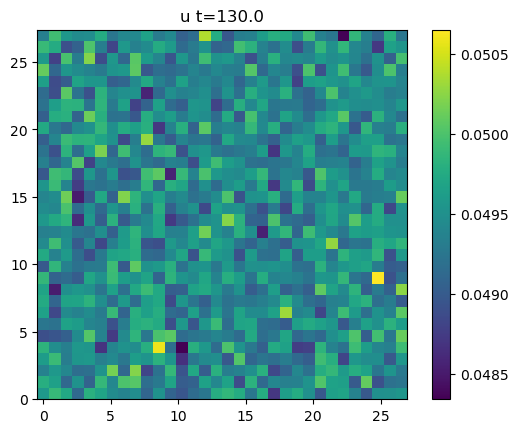

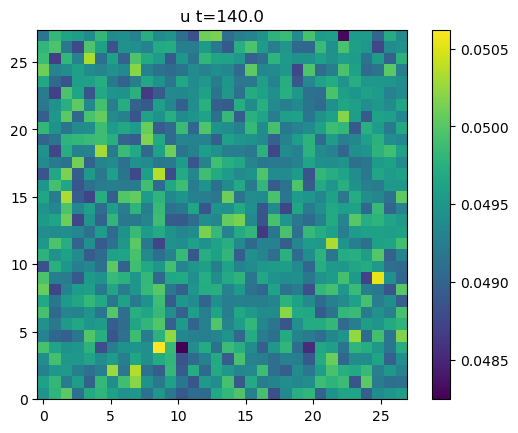

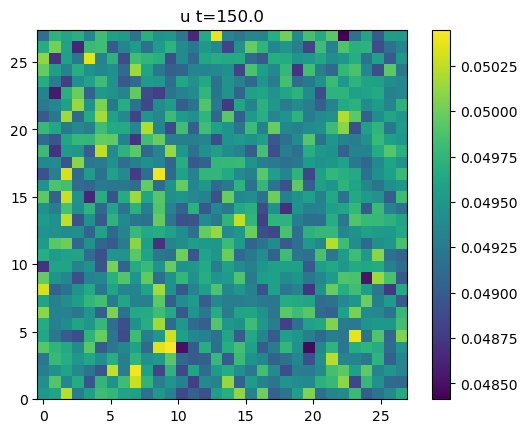

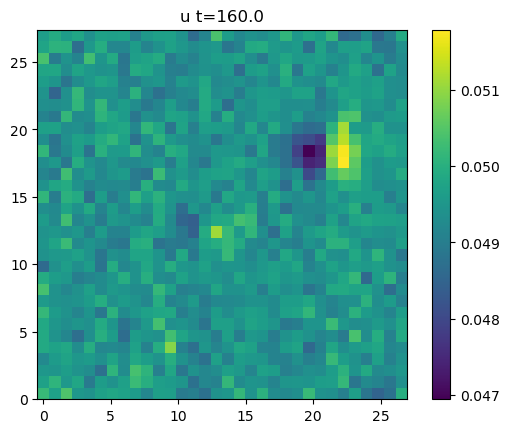

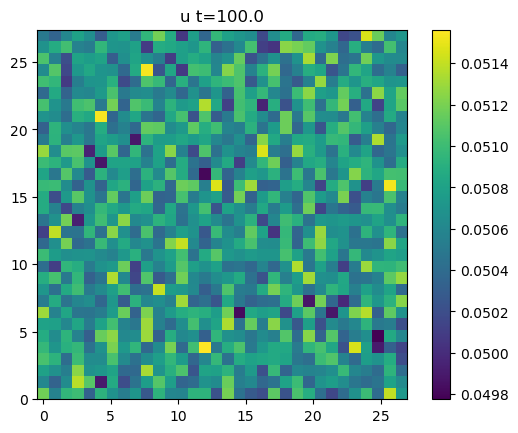

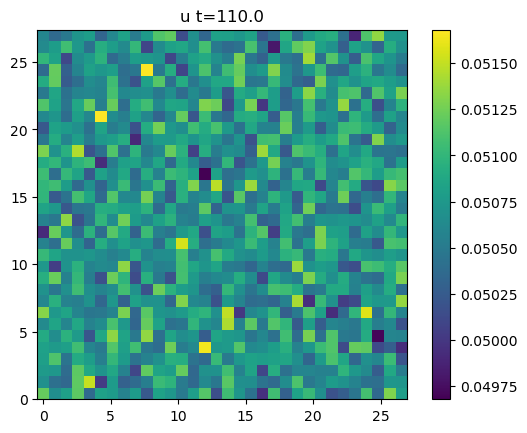

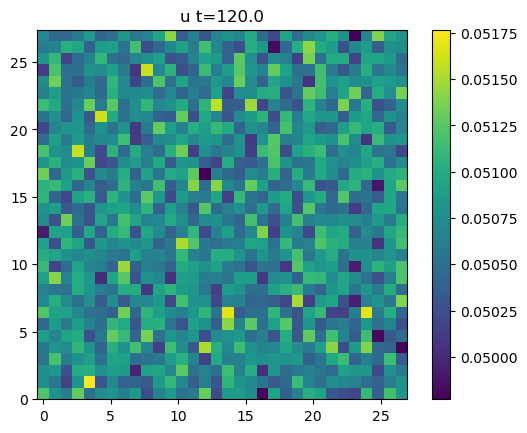

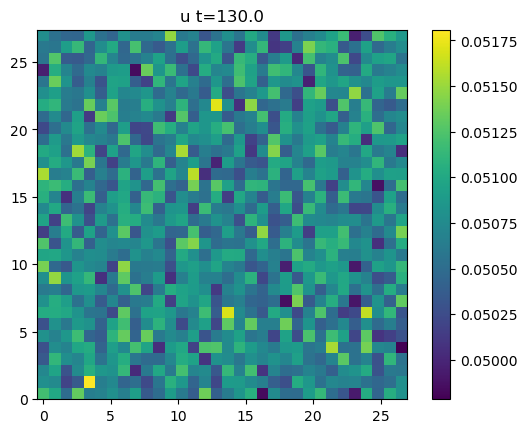

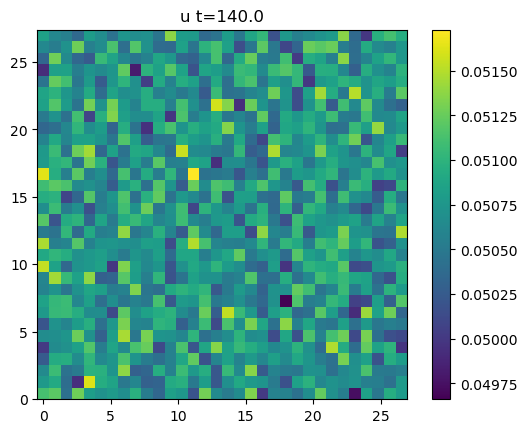

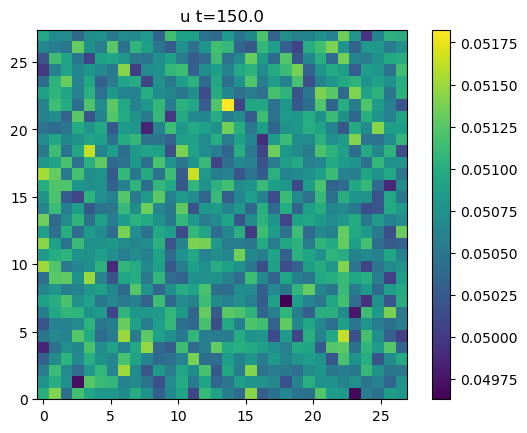

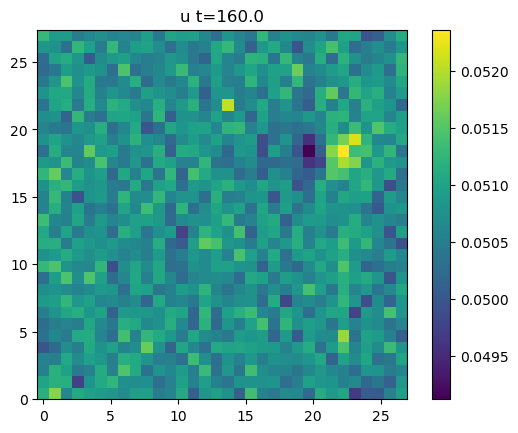

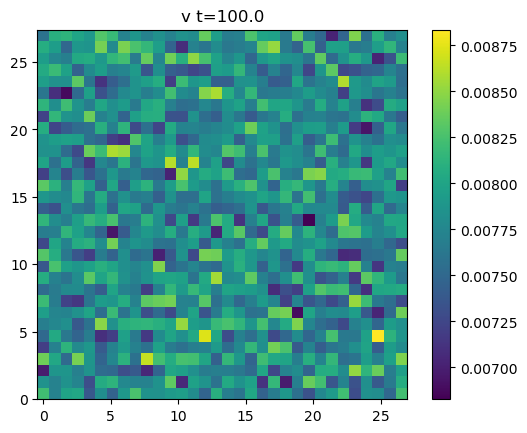

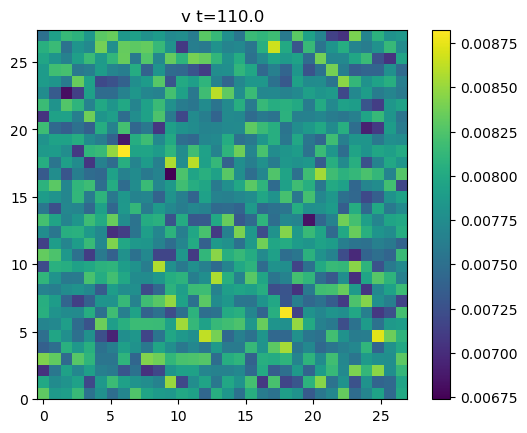

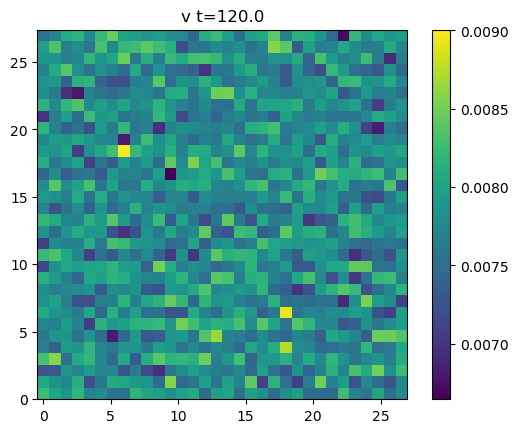

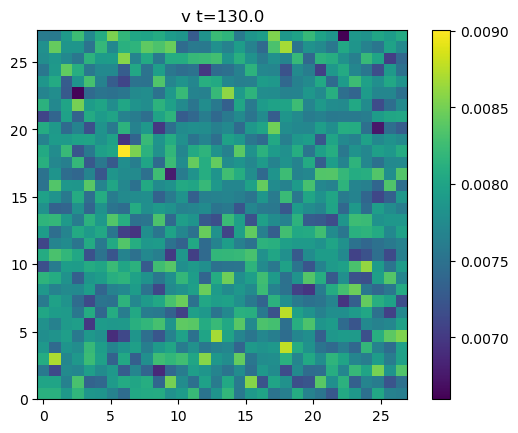

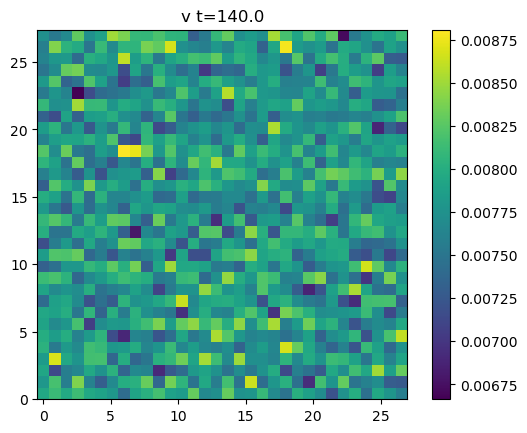

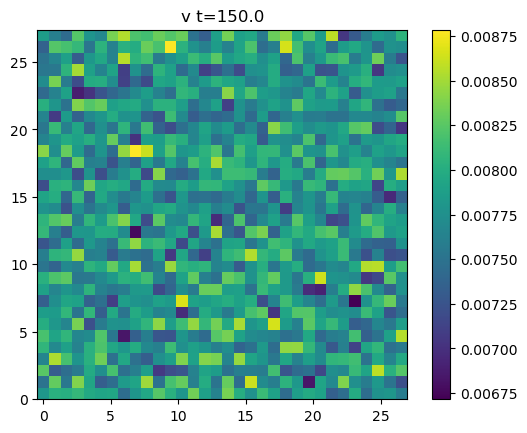

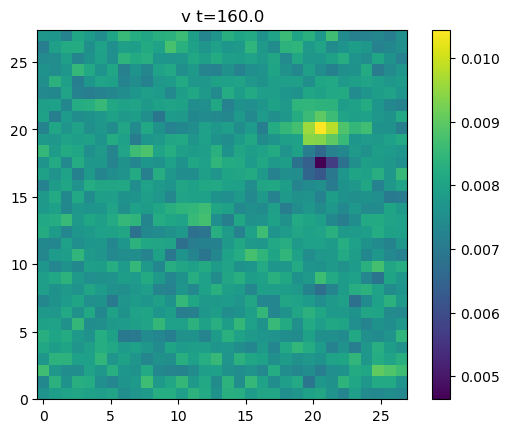

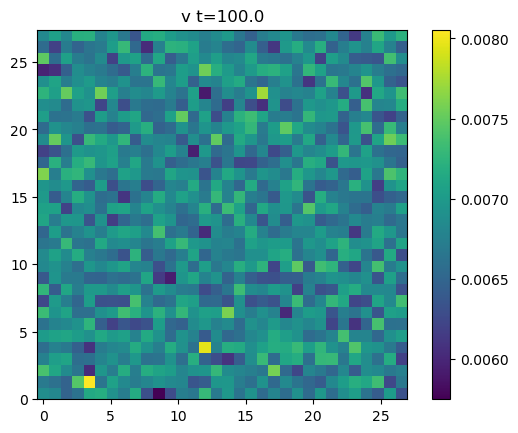

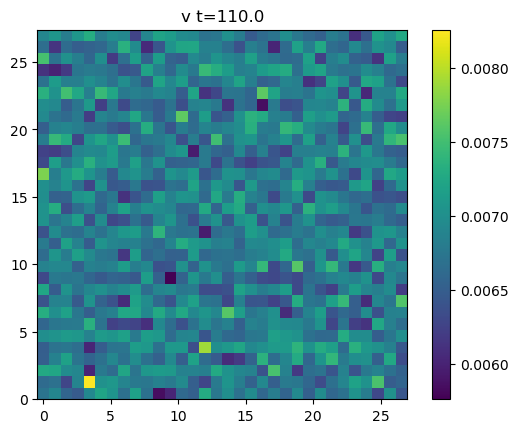

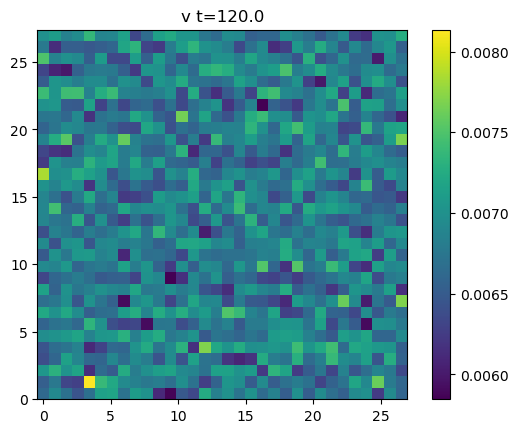

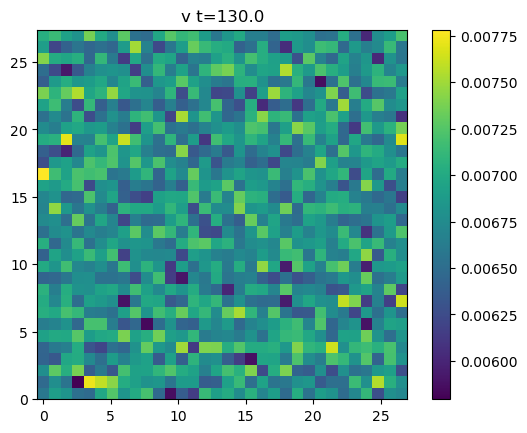

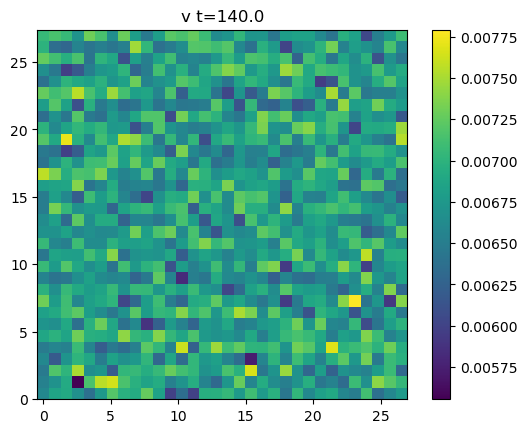

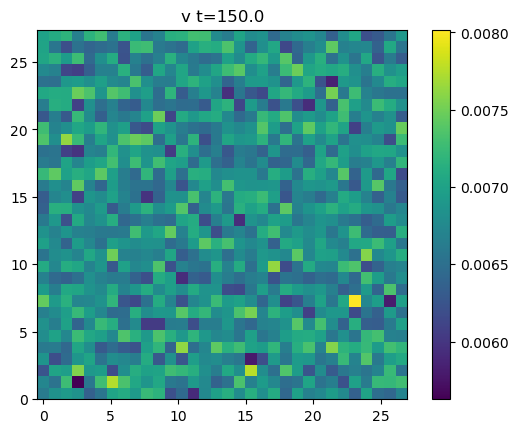

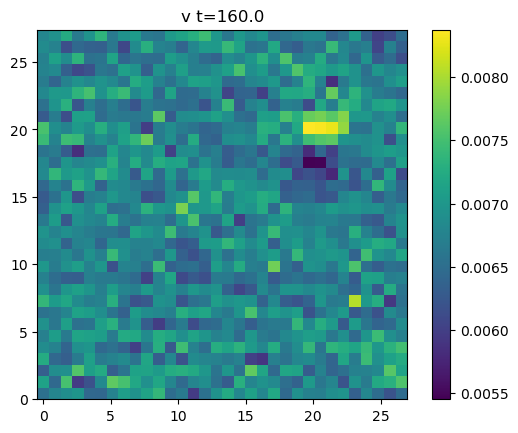

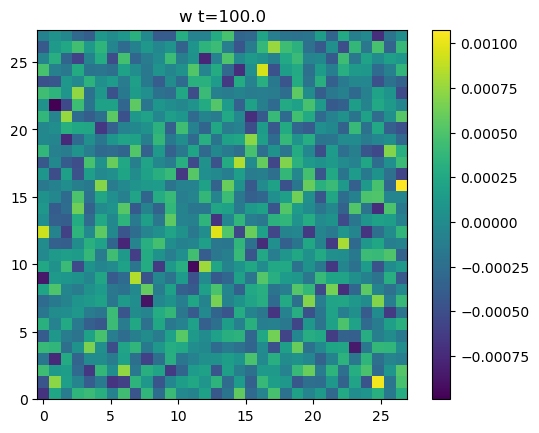

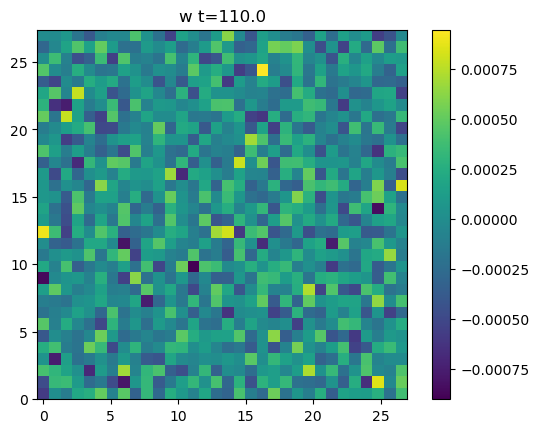

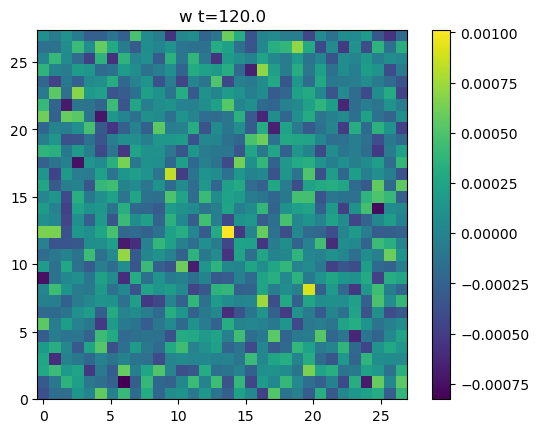

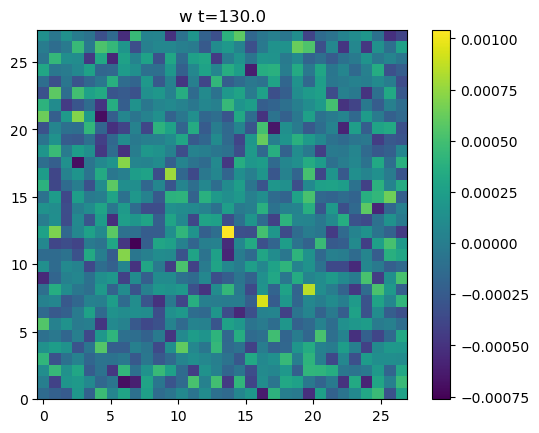

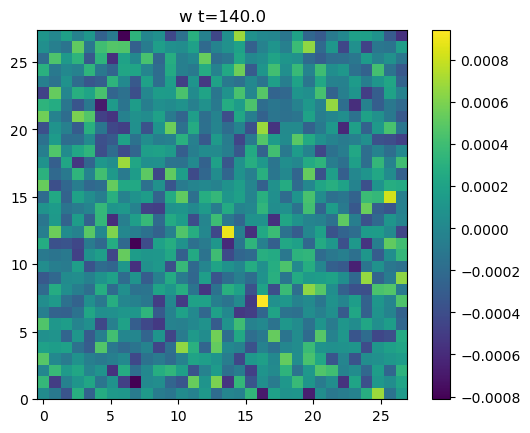

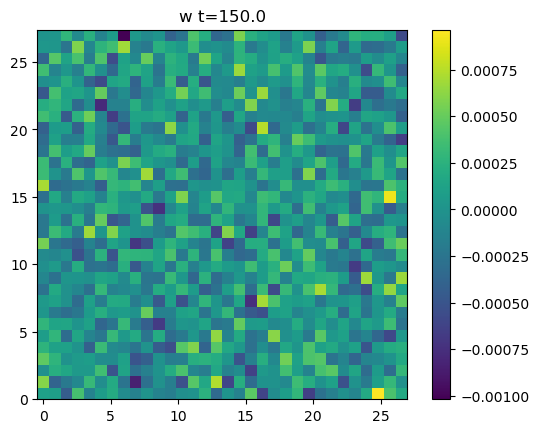

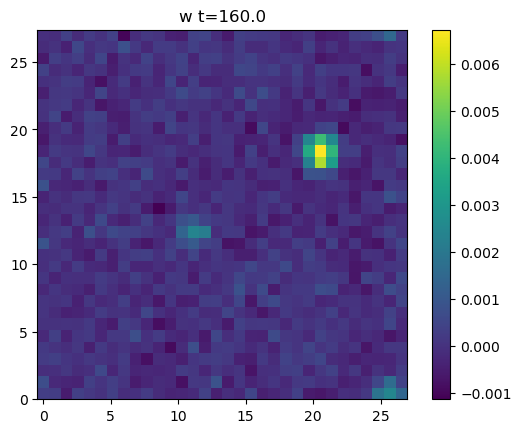

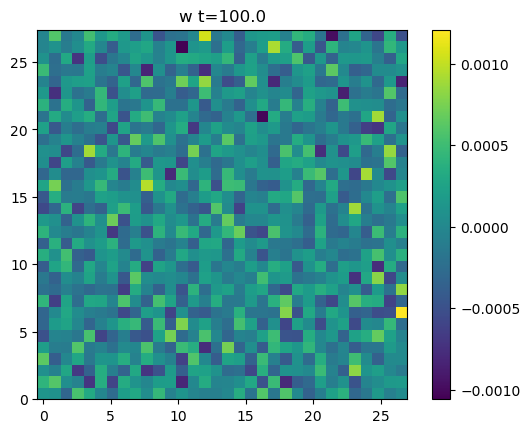

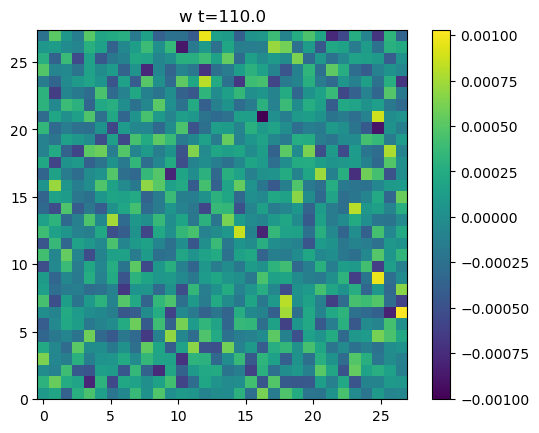

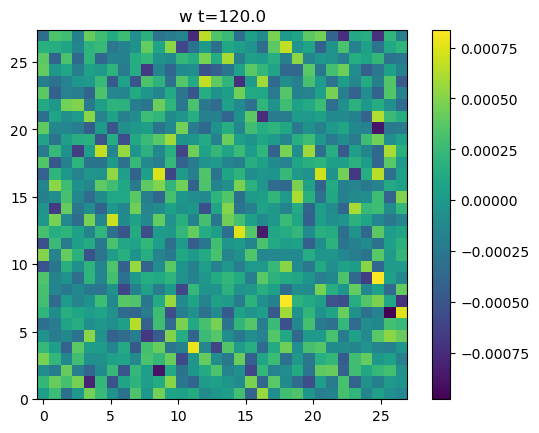

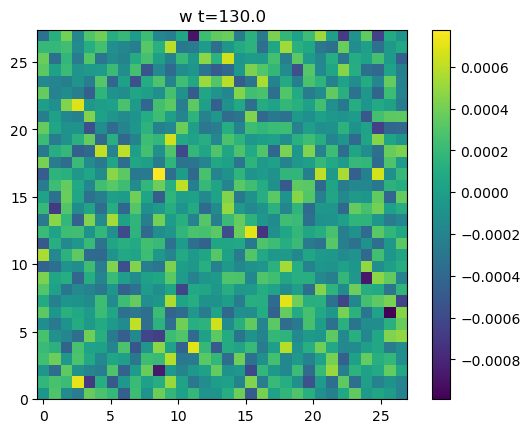

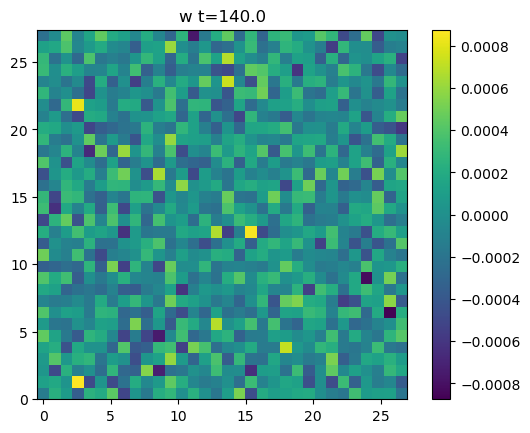

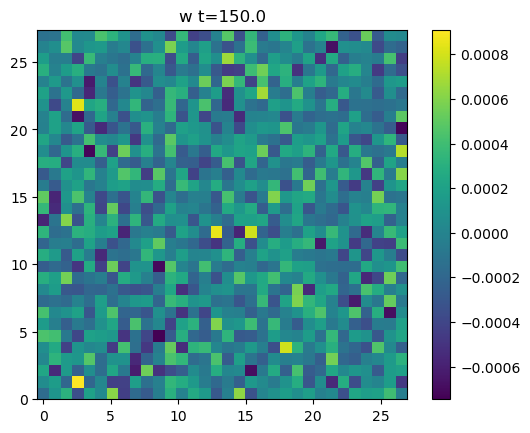

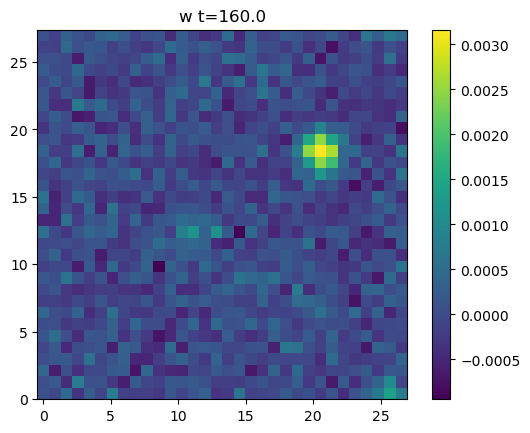

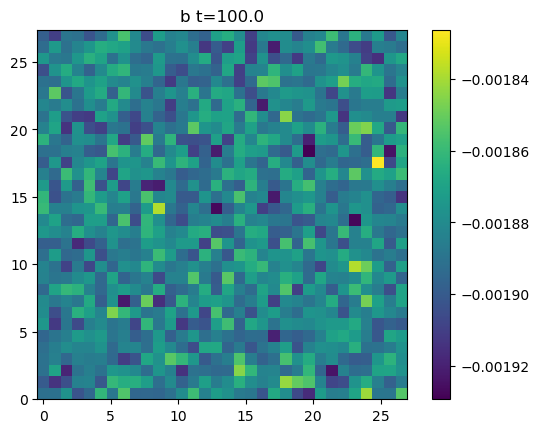

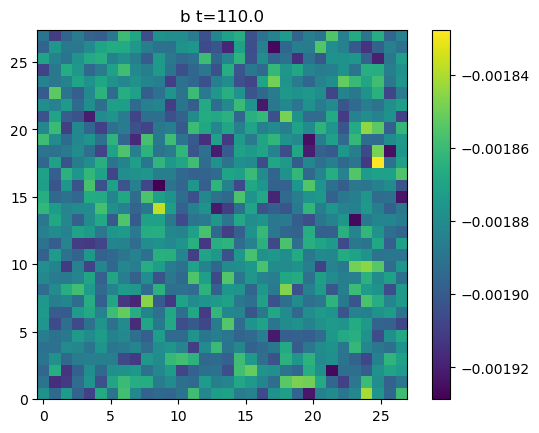

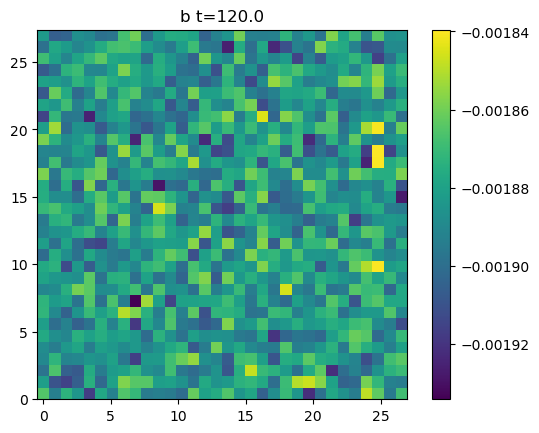

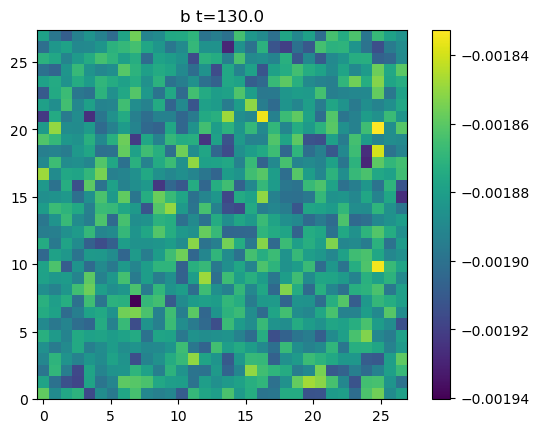

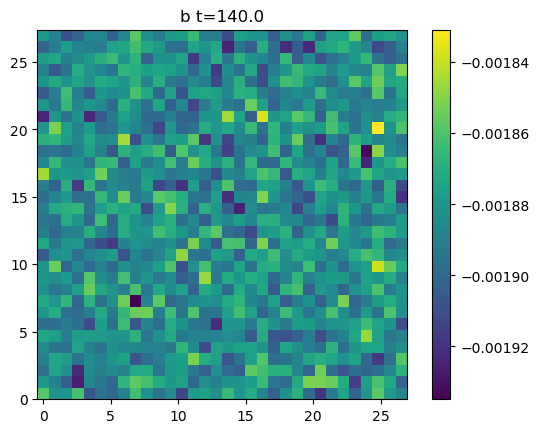

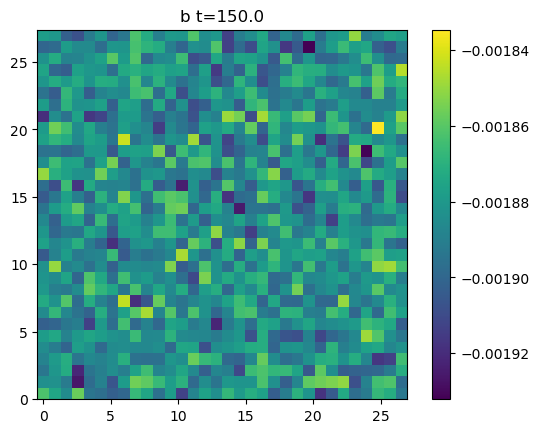

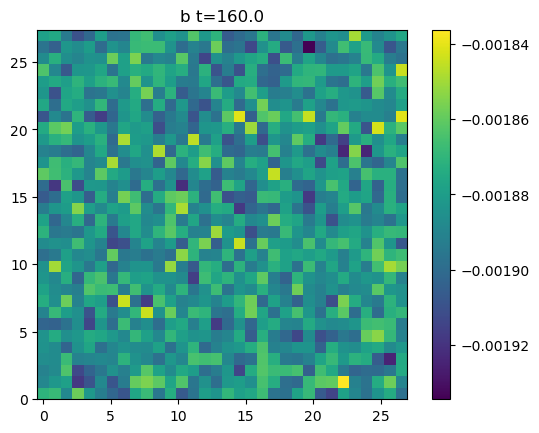

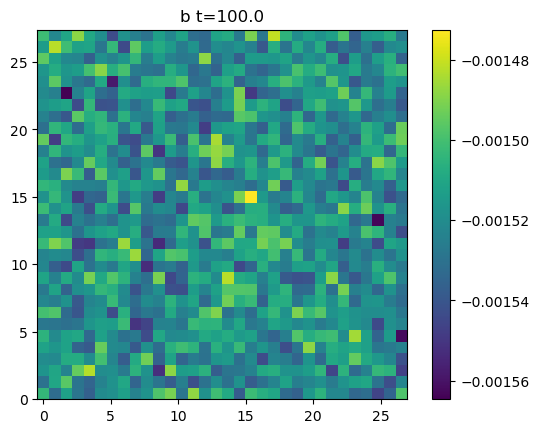

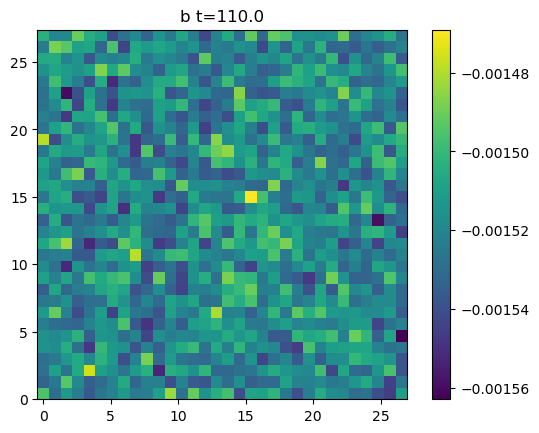

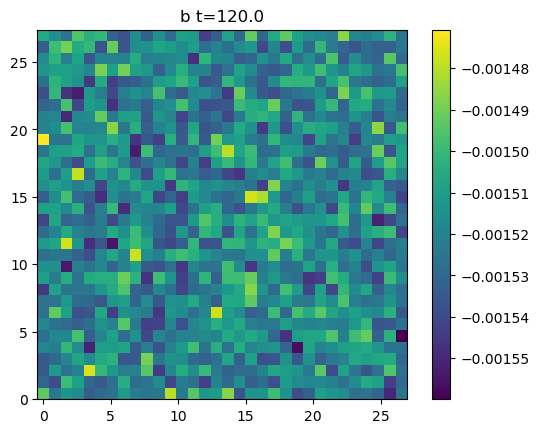

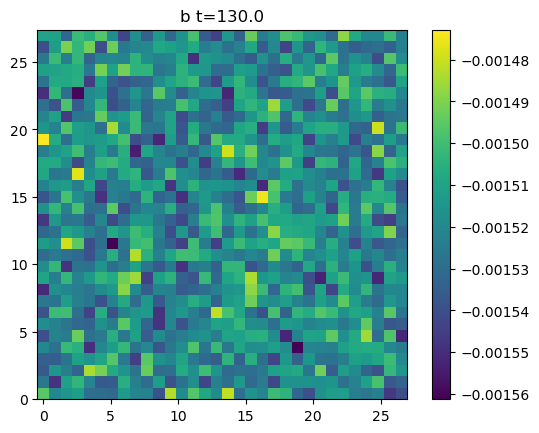

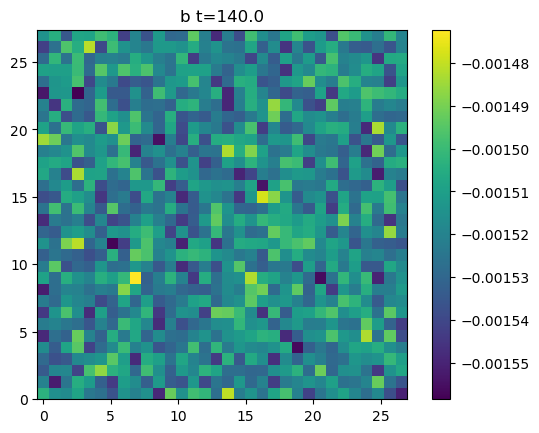

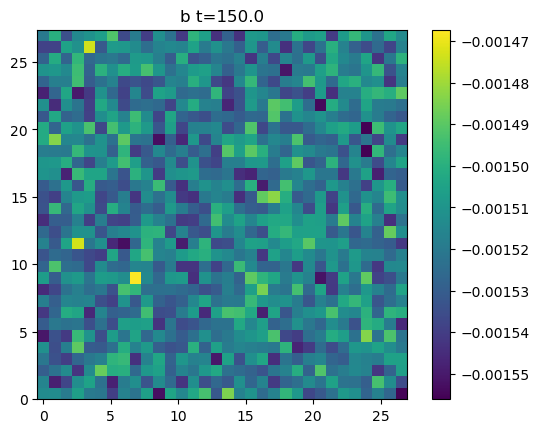

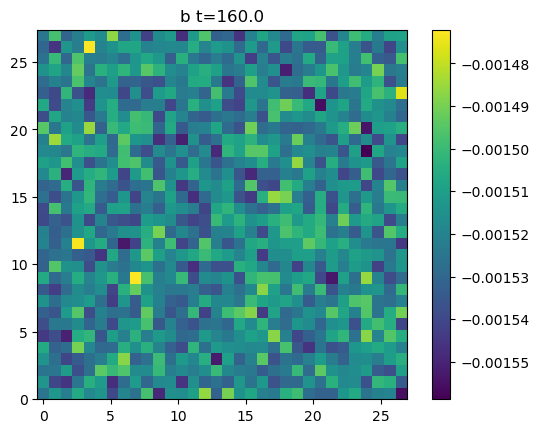

In [19]:
for var in vars:
    for kplot in [10,12]:#range(0,64):
        for tplot in range(time.shape[0]):
            # vmax=0.02
            # vmin=0.0
            fig,axs=plt.subplots(1,1)#,figsize=(20,10))
            try:
                cf=axs.pcolormesh(xh,y,ds[var][tplot,kplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            except:
                cf=axs.pcolormesh(x,yh,ds[var][tplot,kplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            # try:
            #     cf=axs.contourf(xh,y,ds[var][tplot,kplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            # except:
            #     cf=axs.contourf(x,yh,ds[var][tplot,kplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
                              
            axs.set_aspect('equal')
            axs.set_title(var+' t='+str(time[tplot]))

            #cf.set_clim(vmin,vmax)
            #fig.subplots_adjust(right=0.9)
            #cbar_ax = fig.add_axes([0.95, 0.1, 0.01, 0.7])
            #cbar=fig.colorbar(cf,cax=cbar_ax)#,boundaries=np.linspace(vmin,vmax,num=9))
            fig.colorbar(cf)
            
            plt.show()
            del(fig,axs)

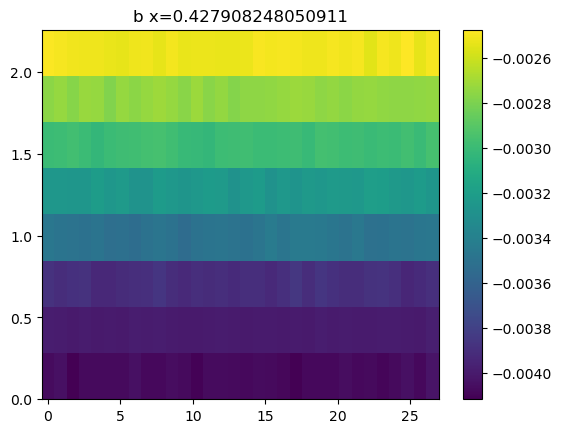

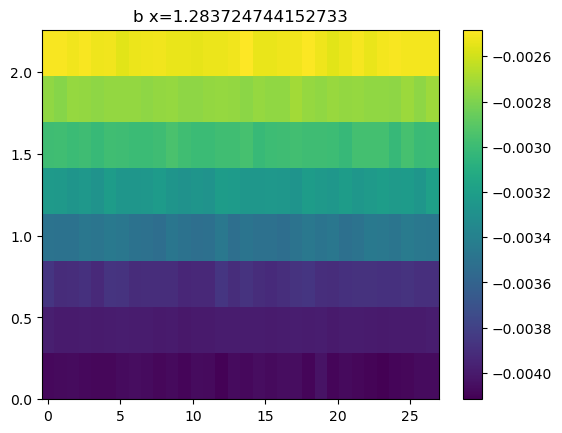

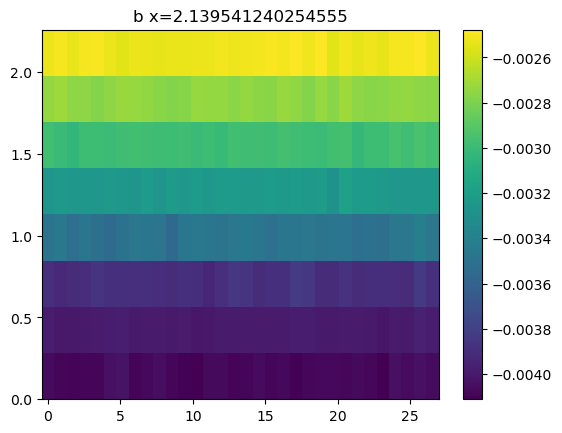

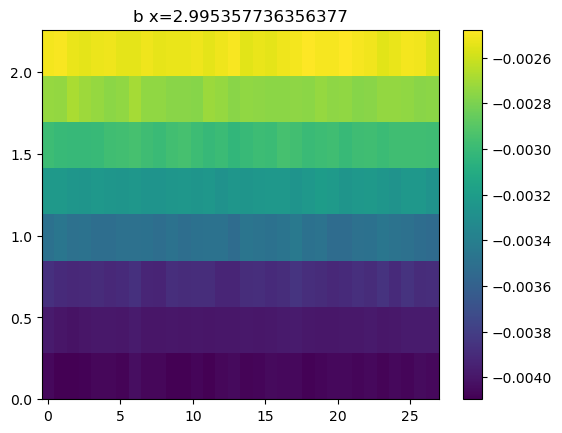

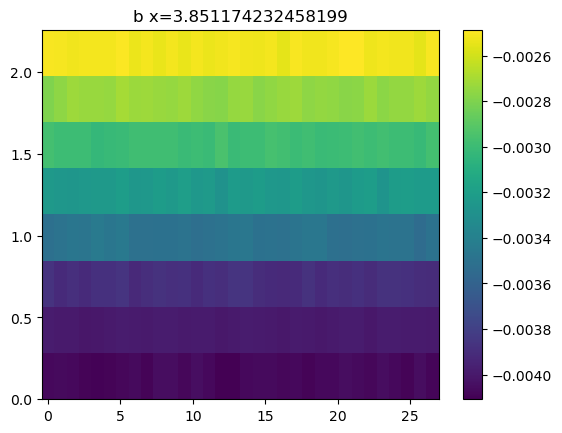

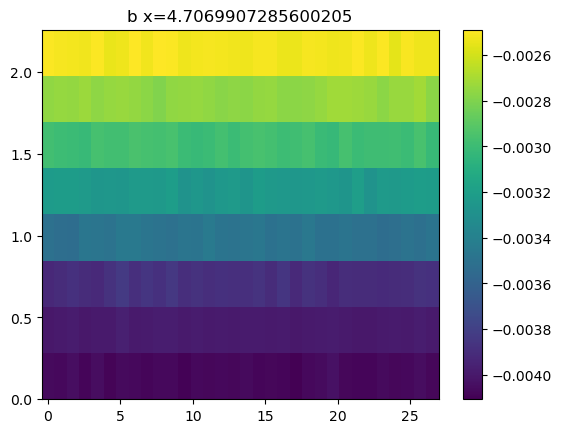

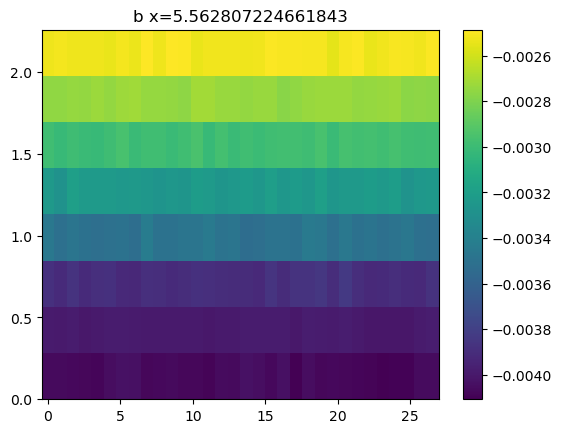

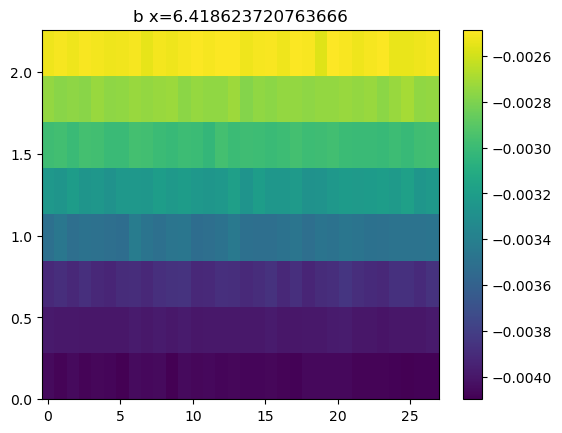

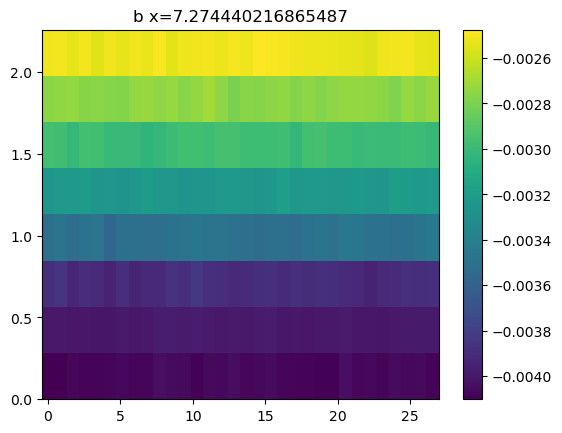

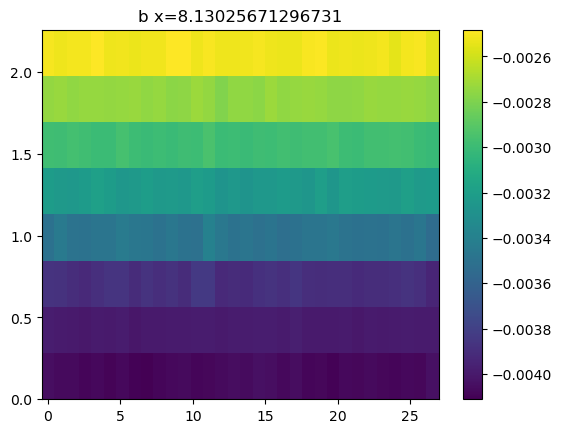

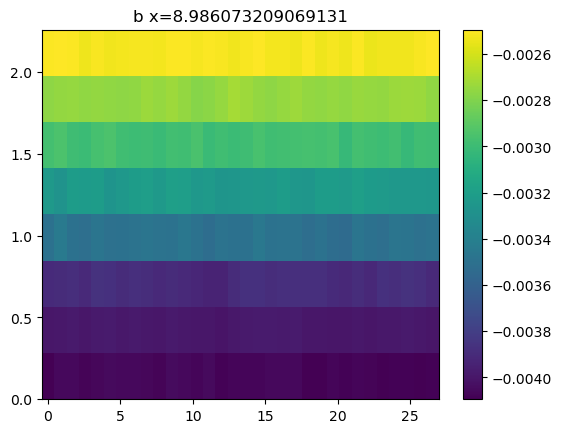

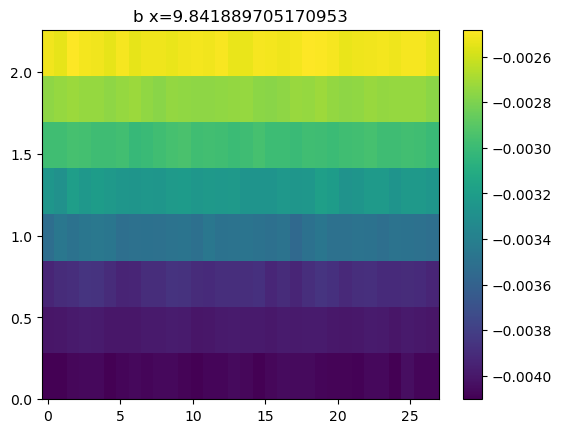

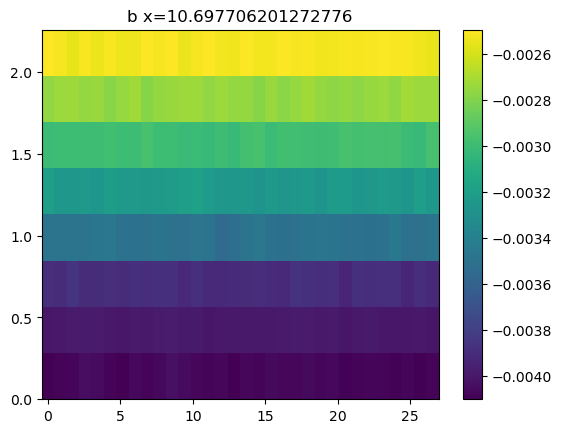

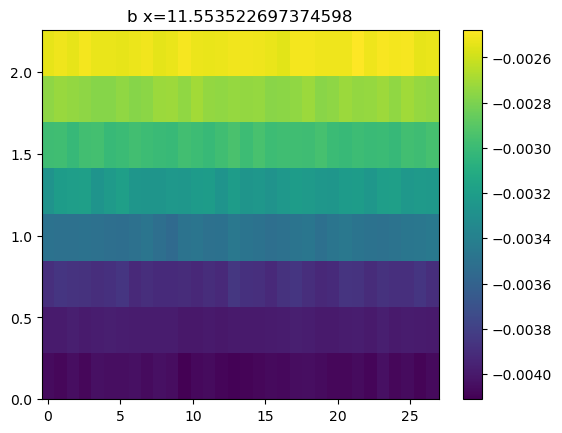

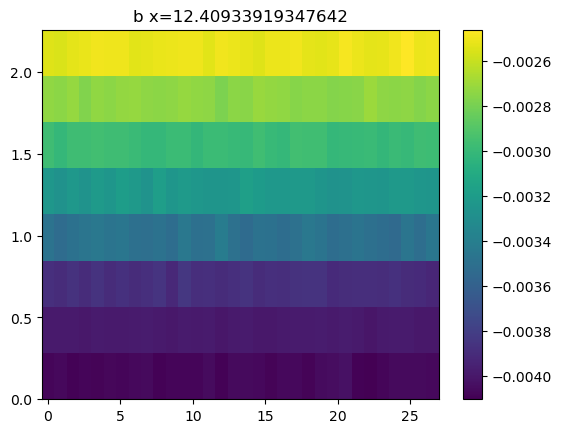

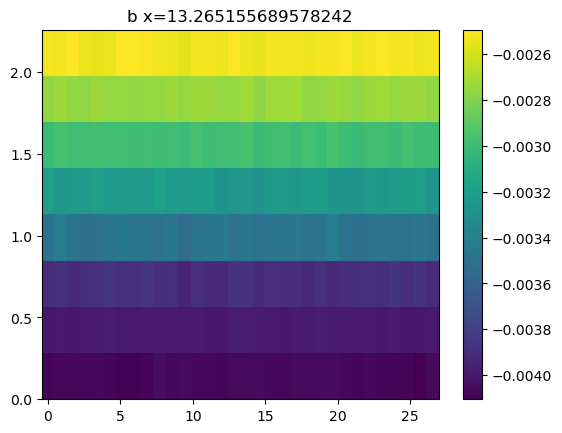

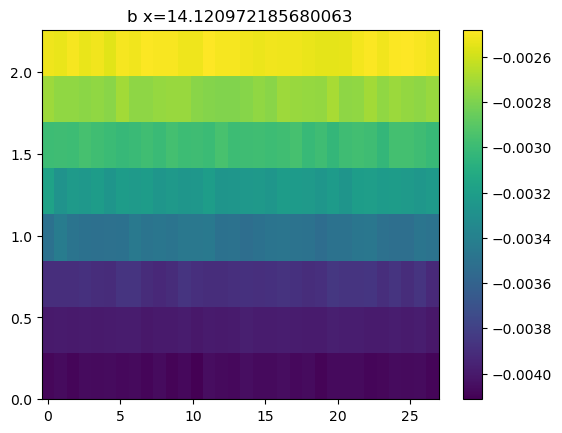

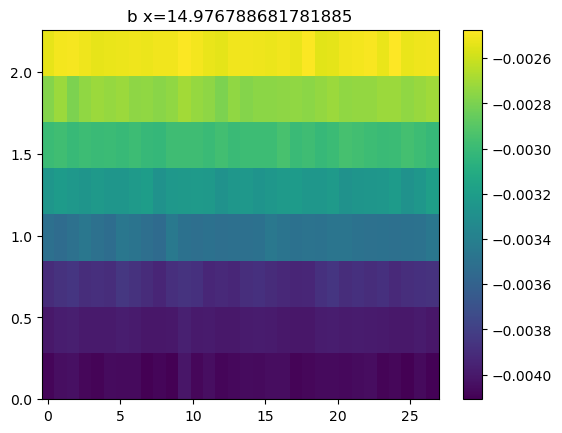

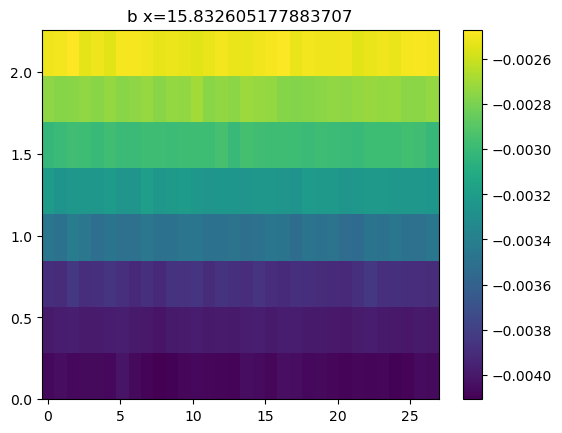

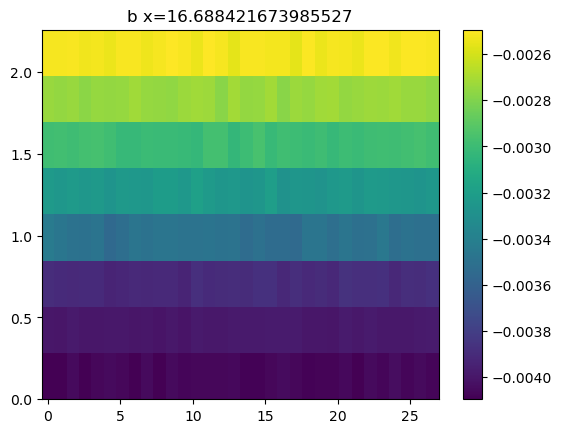

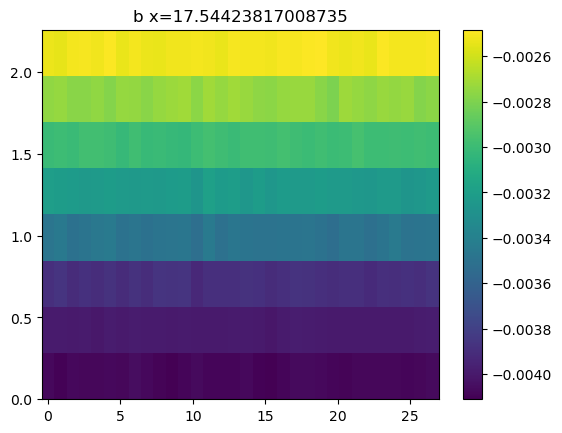

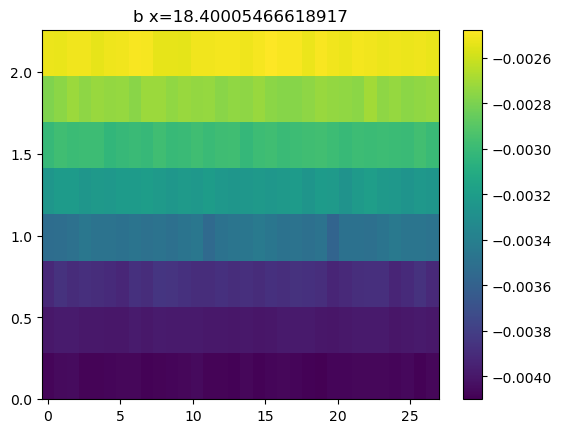

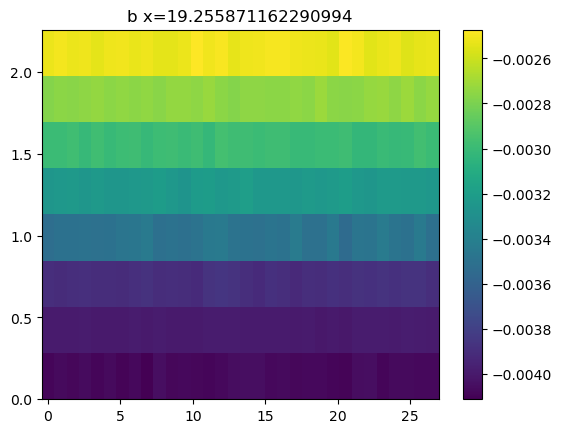

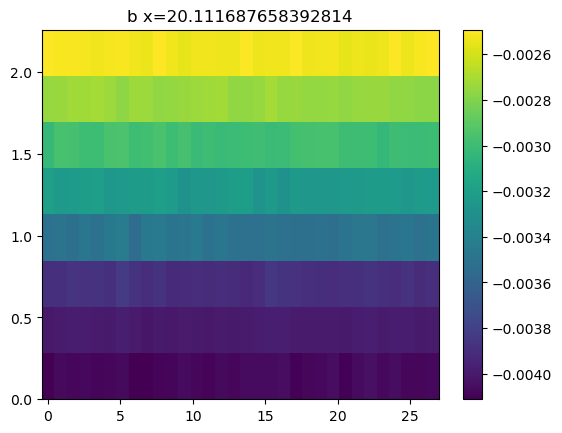

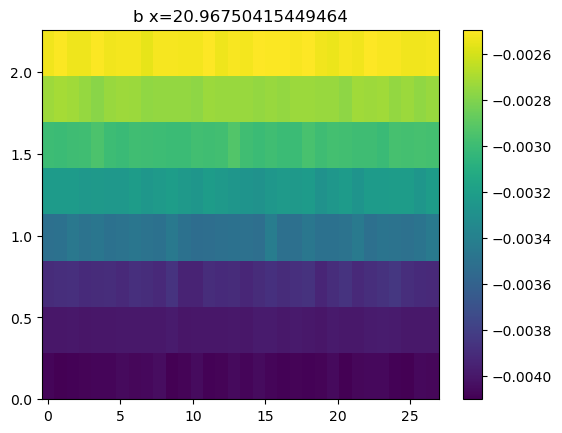

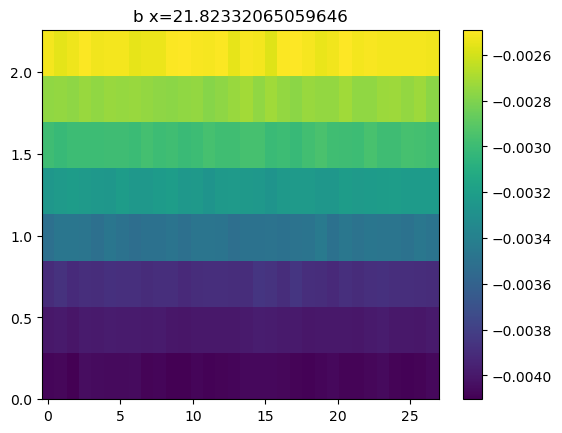

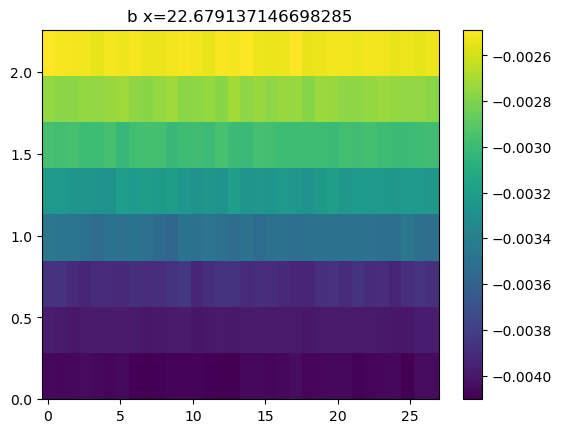

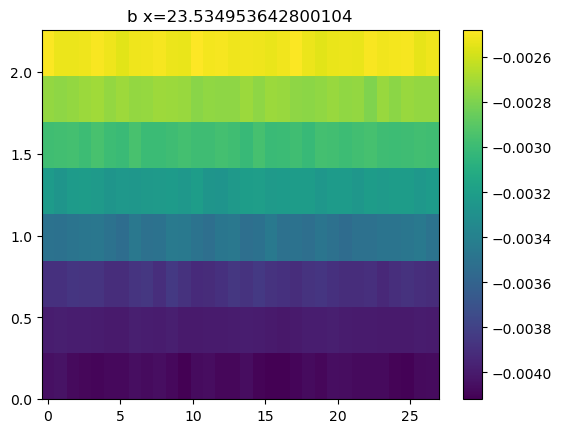

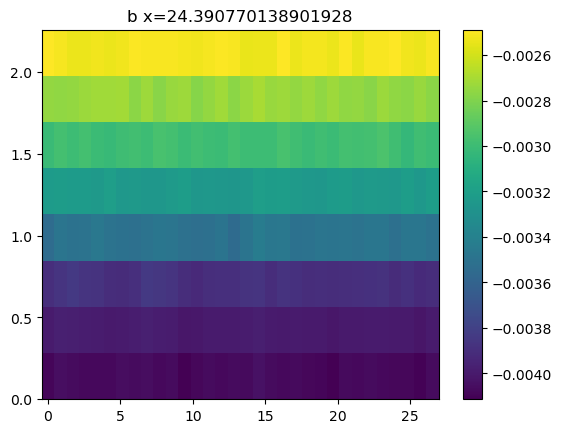

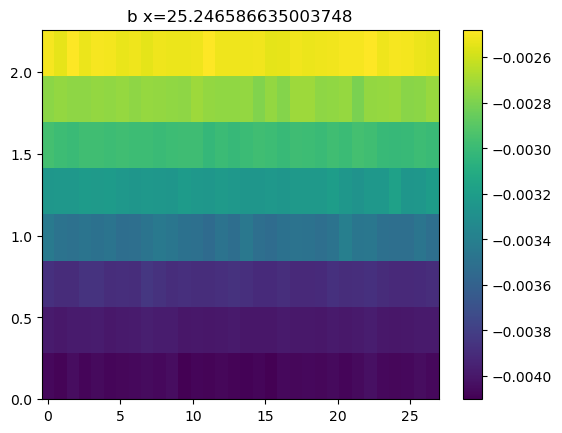

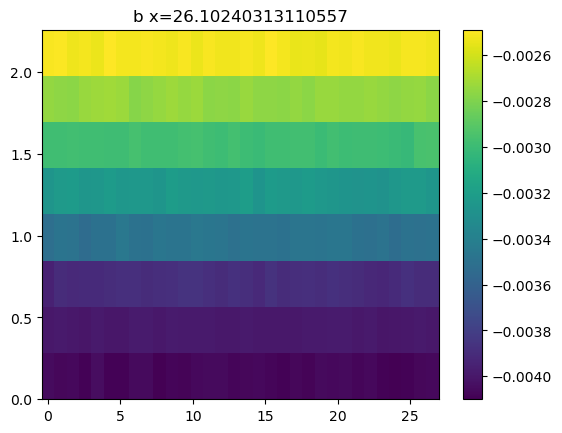

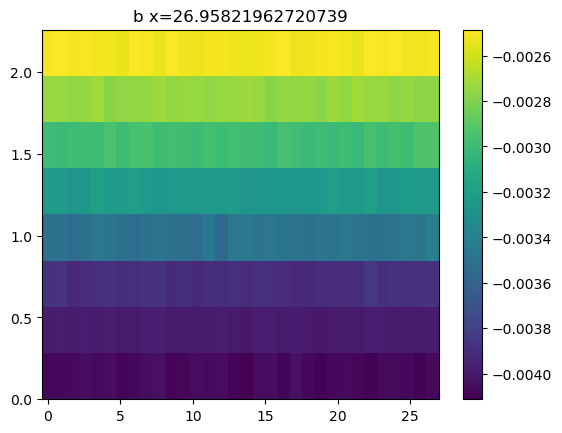

In [18]:
kmin=0
kmax=8
for var in vars[-1]:
    for xplot in range(32):
        for tplot in [0]:#range(time.shape[0]-2,time.shape[0]):
            # vmax=0.02
            # vmin=0.0
            fig,axs=plt.subplots(1,1)#,figsize=(20,10))
            try:
                cf=axs.pcolormesh(xh,z[kmin:kmax],ds[var][tplot,kmin:kmax,:,xplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            except:
                cf=axs.pcolormesh(x,z[kmin:kmax],ds[var][tplot,kmin:kmax,:,xplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            # try:
            #     cf=axs.pcontourf(xh,z[kmin:kmax],ds[var][tplot,kmin:kmax,:,xplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
            # except:
            #     cf=axs.contourf(x,z[kmin:kmax],ds[var][tplot,kmin:kmax,:,xplot].values)#,vmin=vmin,vmax=vmax)#,cmap='bwr')#,shading='gouraud')
                        
            #axs.set_aspect('equal')
            axs.set_title(var+' x='+str(x[xplot]))

            #cf.set_clim(vmin,vmax)
            #fig.subplots_adjust(right=0.9)
            #cbar_ax = fig.add_axes([0.95, 0.1, 0.01, 0.7])
            #cbar=fig.colorbar(cf,cax=cbar_ax)#,boundaries=np.linspace(vmin,vmax,num=9))
            fig.colorbar(cf)
            
            plt.show()
            del(fig,axs)